In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('walmart_stock.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [6]:
timeseries = df['Open']

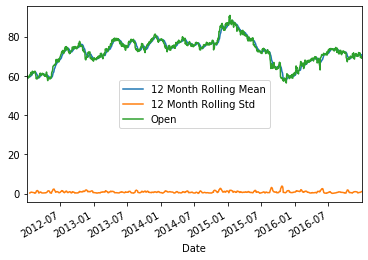

In [9]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

<Figure size 432x288 with 0 Axes>

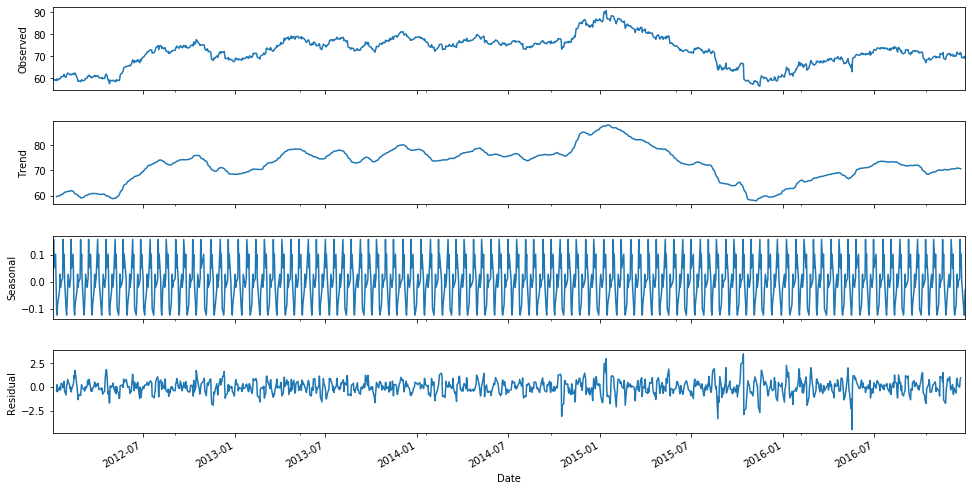

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Open'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [13]:
from statsmodels.tsa.stattools import adfuller
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [14]:
adf_check(df['Open'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.31517314914831
p-value : 0.1671210162134693
#Lags Used : 11
Number of Observations Used : 1246
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [15]:
df['Open First Difference'] = df['Open'] - df['Open'].shift(1)

In [16]:
df['Open First Difference'].head()

Date
2012-01-03         NaN
2012-01-04    0.239998
2012-01-05   -0.860001
2012-01-06    0.070000
2012-01-09   -0.389999
Name: Open First Difference, dtype: float64

In [17]:
adf_check(df['Open First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.395143169790513
p-value : 1.9741449125948393e-18
#Lags Used : 10
Number of Observations Used : 1246
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


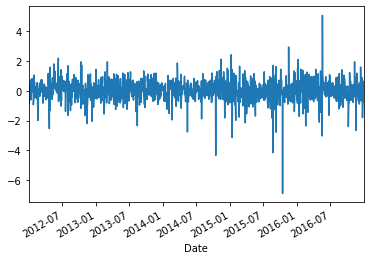

In [18]:
df['Open First Difference'].plot()

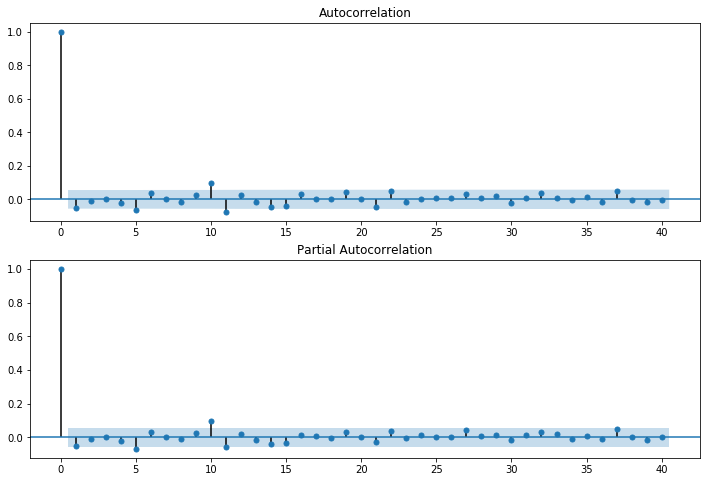

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Open First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Open First Difference'].iloc[13:], lags=40, ax=ax2)

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


In [22]:
# We have seasonal data!(P,D,Q,S)           
model = sm.tsa.statespace.SARIMAX(df['Open'],order=(0,1,0), seasonal_order=(0,1,0,12))             
results = model.fit()          
print(results.summary())

c:\program files (x86)\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               Open   No. Observations:                 1258
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1827.327
Date:                            Wed, 21 Aug 2019   AIC                           3656.654
Time:                                    16:55:35   BIC                           3661.781
Sample:                                         0   HQIC                          3658.581
                                           - 1258                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.1025      0.025     44.135      0.000       1.054       1.151
Ljung-Box (Q):                     

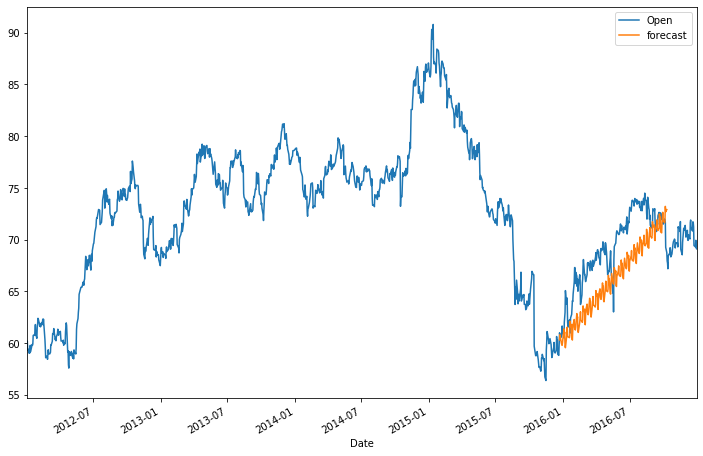

In [23]:
df['forecast'] = results.predict(start = 1000, end= 1200, dynamic= True)             
df[['Open','forecast']].plot(figsize=(12,8))